# Closed form solution for Locally Weighted Regression
- When the data is non linear and follows some curve pattern
- We will find the set of parameters theta for every query point
- And, we will find theta using Closed form soln as it is a formula based apporach (non-iterative)
- We will inlclude a weight term while finding which will be a scalar value, different for every point.

### The below equation will give the optimal requried theta
- $ \theta_{} = (X^TWX)^{-1}X^TWY$

Steps:
1. Read and Normalise the Dataset
2. Generate W for every query point
3. No training is involved, directly make predictions using closed form solution we derived!
4. Find the best value of Tau(Bandwidth parameter) [Cross Validation]

### Step0: Importing req libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression

### Step1: Generating Data

In [44]:
plt.style.use('dark_background')

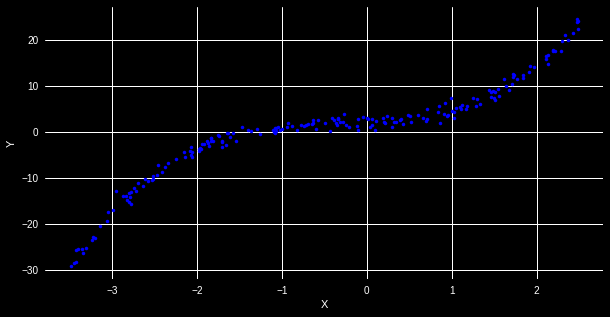

In [45]:
X = 6 * np.random.rand(200, 1) - 3.5
y = 0.9 * X**3 + 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
#equation used -> y = 0.9x^3 + 0.8x^2 + 0.9x + 2
#visualize the data
plt.figure(figsize=(10,5))
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [46]:
print(X.shape)
print(y.shape)

(200, 1)
(200, 1)


In [47]:
# Normalize the data 
X = (X-X.mean())/X.std()

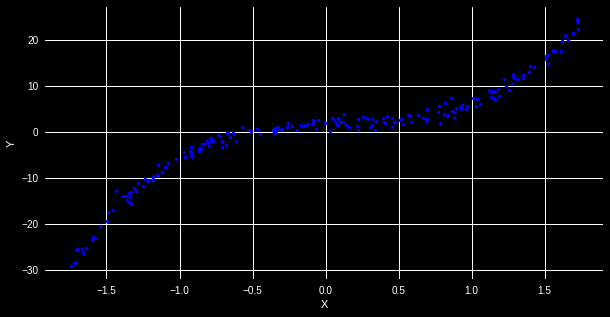

In [48]:
#visualize the data
plt.figure(figsize=(10,5))
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

- We will compute theta for every query point i.e. x_test
- No fixed parameters

### Find out $W_{(m*m)}$ diagonal matrix


### $W_{(m*m)} = e^\frac{-(X_i - X)^2}{2\tau^2}$
### $(X_i - X)^2 = (X_i - X)^T*(X_i - X)$

- print(type(np.mat(np.eye(5))))
- print(type(np.eye(5)))
- a*b => if a and b are np.matrix -> Matrix multiplication
- a*b => if a and b are np.array  -> Element wise muliplication

In [49]:
def getW(query_pt, X,tau):
    m = X.shape[0]
    W = np.mat(np.eye(m))

    for i in range(m):
        # Xi - any point in the dataset
        W[i,i] = np.exp(np.dot((X[i]-query_pt),(X[i]-query_pt).T/(-2*tau*tau)))
        
    return W


In [50]:
X_copy = X
y_copy = y

In [51]:
X = np.mat(X)
y = np.mat(y)

### Make predictions using below formulae

- $ \theta_{} = (X^TWX)^{-1}X^TWY$

In [52]:
def predict(X,y,query_pt,tau):
    # add dummy feature 
    m = X.shape[0]
    ones = np.ones((m,1))
    X_ = np.hstack((X,ones))

    qx = np.mat([query_pt,1])
    W = getW(qx,X_,tau)

    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*y))
    # print(theta.shape)
    #Find the prediction
    pred = np.dot(qx,theta)
    return pred

In [53]:
pred = predict(X,y,1.0,0.5)

In [54]:
np.array(pred)[0][0]

8.162579702014831

### Visualise Predictions, Analyse the effect of $\tau$ value 

In [55]:
X_test = X_copy

### For $\tau$ = 1

In [56]:
y_pred1 = [np.array(predict(X,y,x[0],1))[0][0] for x in X_test]

In [57]:
y_pred1 = np.array(y_pred1)

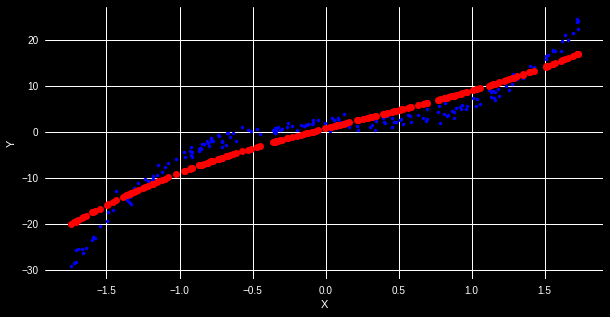

In [58]:
#visualize the data
plt.figure(figsize=(10,5))
plt.plot(X_copy, y_copy, 'b.')
plt.plot(X_test,y_pred1,'ro')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### For $\tau$ = 0.5

In [59]:
y_pred2 = np.array([np.array(predict(X,y,x[0],0.5))[0][0] for x in X_test])

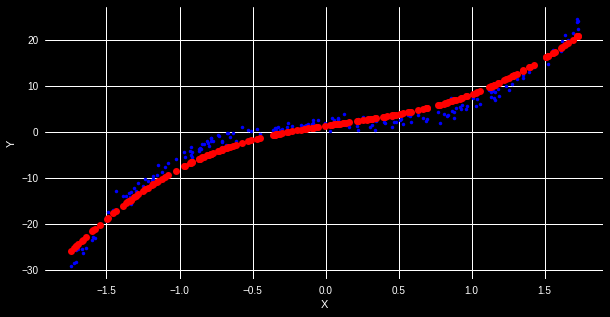

In [60]:
#visualize the data
plt.figure(figsize=(10,5))
plt.plot(X_copy, y_copy, 'b.')
plt.plot(X_test,y_pred2,'ro')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#### For $\tau$ = 0.1

In [61]:
y_pred3 = np.array([np.array(predict(X,y,x[0],0.1))[0][0] for x in X_test])

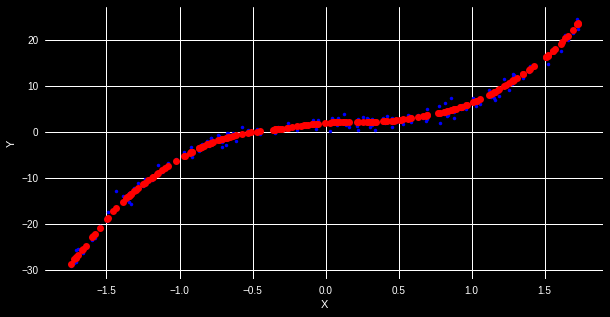

In [62]:
#visualize the data
plt.figure(figsize=(10,5))
plt.plot(X_copy, y_copy, 'b.')
plt.plot(X_test,y_pred3,'ro')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()